In [133]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import math

### 1. Euclidean plane

Consider this 3 points on 2D space:  
$A=(4, 5)$  
$B=(-2, -4)$  
$C=(8, -1)$  

#### 1.1. Plot them using `matplotlib`  

In [35]:
A = (4, 5)
B = (-2, -4)
C = (8, -1)

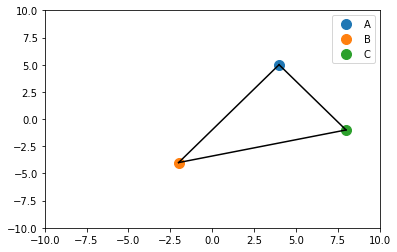

In [36]:
fig, ax = plt.subplots()

# add points. "o" stands for circle, "*" would be a star point
plt.plot(A[0], A[1], "o", markersize=10, label="A")
plt.plot(B[0], B[1], "o", markersize=10, label="B")
plt.plot(C[0], C[1], "o", markersize=10, label="C")

# set axis limits
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
# this adds top right legend for labeled elements
plt.legend()

ax.plot((A[0], B[0]), (A[1], B[1]), "black")
ax.plot((A[0], C[0]), (A[1], C[1]), "black")
ax.plot((B[0], C[0]), (B[1], C[1]), "black")



#### 1.2. Which distance is longer, $AC, AB, \text{or} BC$? Write a function that calculates distance between two points.

In [45]:
def distance(x1, x2):
    
    c1 = x2[0] - x1[0]
    c2 = x2[1] - x1[1]
    result  = math.sqrt(c1 ** 2 + c2 ** 2)

    return result

In [46]:
dist_ab = distance(A, B)
dist_ab

10.816653826391969

In [47]:
dist_ac = distance(A, C)
dist_ac

7.211102550927978

In [48]:
dist_bc = distance(B, C)
dist_bc

10.44030650891055

The longer distance is BC.

#### 1.3. What is the perimeter of triangle $ABC$?

In [49]:
#The perimeter of the triangle is the sum of the sides of it.

perimeter = dist_ab + dist_ac + dist_bc
perimeter

28.4680628862305

### 2. Linear functions

Consider the following straight lines on 2D space:  
$y_1=2x-3$  
$y_2=-3x+12$  

#### 2.1. Plot them

In [59]:
def initialize_grid():
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # where do we want lines
    ticks = np.arange(-20, 20, 1)
    
    # draw grid
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.grid(True, which='both')
    
    # 1-1 X and Y proportion
    ax.set_aspect('equal')
    
    # X and Y axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    # set axes' limits
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])

In [104]:
x = np.linspace(
    start=-20, 
    stop=20, 
    num=300
)

y1 = (2 * x) -3
y2 = (-3 * x) +12

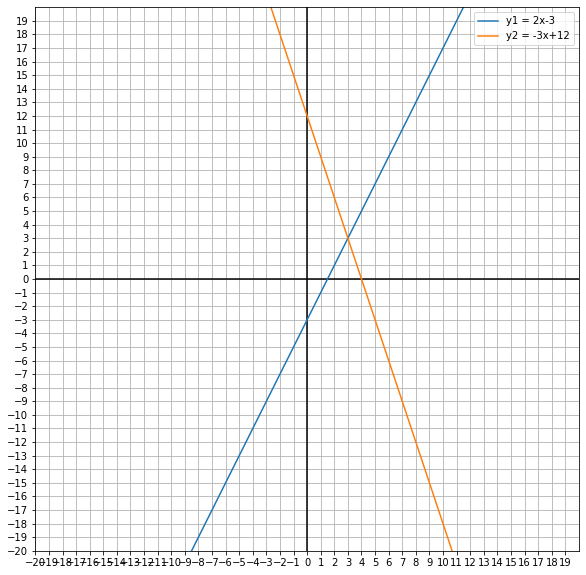

In [105]:
initialize_grid()
# "-" for line type
plt.plot(x, y1, "-", markersize=10, label="y1 = 2x-3")
plt.plot(x, y2, "-", markersize=2, label="y2 = -3x+12")

plt.legend()

#### 2.2. What are the respective slopes

"formula_1" and "formula_2" functions are defined to get different points from the lines y1 and y2 with an x coordinate given. 

"slope" function is defined to get every slope from two given points.

In [106]:
def formula_1(x):
    y1 = (2 * x) -3
    result = (x, y1)
    return result

In [107]:
point_1A = formula_1(2)
point_1B = formula_1(4)
print(point_1A)
print(point_1B)

(2, 1)
(4, 5)


In [108]:
def formula_2(x):
    y2 = (-3 * x) +12
    result = (x, y2)
    return result

In [109]:
point_2A = formula_2(2)
point_2B = formula_2(4)
print(point_2A)
print(point_2B)

(2, 6)
(4, 0)


In [110]:
def slope(A,B):
    m = ((B[1]- A[1])/ (B[0]- A[0]))
    return m

In [111]:
#Slope of the first function
m1 = slope(point_1A, point_1B)

In [112]:
#Slope of the second function
m2 = slope(point_2A, point_2B)

#### 2.3. Give 3 points through which $y_1$ goes through

In [113]:
for x in range(1, 4):
    y = (2 * x) -3
    print(f"({x},{y}) is a point of y1.")

(1,-1) is a point of y1.
(2,1) is a point of y1.
(3,3) is a point of y1.


#### 2.4. Where do they intersect?

In [114]:
#for y1 when x = 0
b1 = formula_1(0)
b2 = formula_2(0)

x_int = (b1[1]-b2[1]) / (m2-m1)
y_int = m1 * x_int + b1[1]

print(f"The point where both functions intersect is: ({x_int}, {y_int}).")

The point where both functions intersect is: (3.0, 3.0).


#### 2.5. BONUS 

My yearly salary has increased **linearly** with my age:  
When I was 21 years old, I did 10000\\$ / year    
Today I am 39 years old, I am doing 33400\\$ / year  
How much will I do when I get 50 years old?

In [115]:
linear_1 = (21, 10000)
linear_2 = (39, 33400)

linear_m = slope(linear_1, linear_2)

salary_50 = linear_m * 50
salary_50

65000.0

### 3. Polynomials

Consider these different degree polynomials:  
$y_2=x^2-3x-10$  
$y_3=x^3-2x^2+5x+1$  
$y_4=x^4-x^3+x^2-x+1$  

#### 3.1. Plot them

In [124]:
x = np.linspace(
    start=-20, 
    stop=20, 
    num=300
)

y2 = x**2 -3*x - 10
y3 = x**3 -2*x**2 + 5*x +1
y4 = x**4 -x**3 +x**2 -x +1

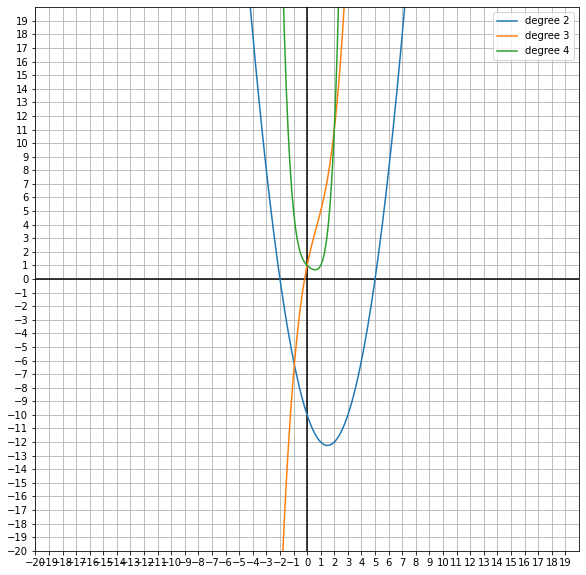

In [125]:
initialize_grid()

plt.plot(x, y2, "-", label="degree 2")
plt.plot(x, y3, "-", label="degree 3")
plt.plot(x, y4, "-", label="degree 4")

plt.legend()

#### 3.2. Which one takes a bigger value on $x=0$? On $x=2$? On $x=100$?

In [145]:
x = 0

y2 = x**2 -3*x - 10
y3 = x**3 -2*x**2 + 5*x +1
y4 = x**4 -x**3 +x**2 -x +1

print(y2, y3, y4)

-10 1 1


In [146]:
x = 2

y2 = x**2 -3*x - 10
y3 = x**3 -2*x**2 + 5*x +1
y4 = x**4 -x**3 +x**2 -x +1

print(y2, y3, y4)

-12 11 11


In [147]:
x = 100

y2 = x**2 -3*x - 10
y3 = x**3 -2*x**2 + 5*x +1
y4 = x**4 -x**3 +x**2 -x +1

print(y2, y3, y4)

9690 980501 99009901


#### 3.3. Who is the vertex of parabola $y_2$?

In [150]:
#Si igualas la derivada de la función a 0, te queda la coordenada x del vértice, ya sea máximo o mínimo. 

y = 2 * x -3
y = 0
x = 1.5
y2 = x**2 -3*x - 10
print(f"({x},{y2}) is the vertex.")

(1.5,-12.25) is the vertex.


#### 3.4. Where does $y_2$ intersect X axis? And Y axis?

In [152]:
##FALTA

x = 0
y2 = x**2 -3*x - 10
print(y2)



-10


#### 3.5. As x gets very big, what happens to $y$ go in each case?

y2 and y4 parabolas are similar so their behavior is similar. They have a minimum point (vertex) so when x gets bigger after the vertex, y go up exponentially. It happens the same at the left side of the vertex.

y3 has an exponentiah growth in the y-axis. 

#### 3.6. As x gets very small (big negative), what happens to $y$ go in each case?

We have explained the case for y2 and y4 above. For y3, when x gets very small, the value of y is very very big because it decrease exponentially.

### 4. Exponential

#### 4.1. Print number $e$ rounded to 3 decimal figures

In [153]:
round(math.exp(1), 3)

2.718

#### 4.2. Compute $e$ to the powers 0, 1, 2, 3, 10

In [154]:
for power in [0,1,2,3,10]:
    print(math.exp(power))

1.0
2.718281828459045
7.38905609893065
20.085536923187668
22026.465794806718


#### 4.3. Compute $e$ to the powers 0, -1, -2, -3, -10

In [155]:
for power in [0,-1, -2, -3, -10]:
    print(math.exp(power))

1.0
0.36787944117144233
0.1353352832366127
0.049787068367863944
4.5399929762484854e-05


#### 4.4. Plot functions $e^x$, $e^{2x}$, $e^{-x}$

Note: choose an appropiate x-range to visualize them all toguether

In [ ]:
## FALTA

### 5. Sum notation

Find the following:

$$\sum_{n=4}^7 n$$

In [156]:
4+5+6+7

22

$$\sum_{n=-2}^3 (n + 1)$$

In [157]:
(-2+1)+(-1+1)+(0+1)+(1+1)+(2+1)+(3+1)

9

$$\sum_{n=-2}^3 (n^2 - 2)$$

In [158]:
((-2**2)-2)+((-1**2)-2)+((0**2)-2)+((1**2)-2)+((2**2)-2)+((3**2)-2)

-3

$$\sum_{n=0}^4 (10^n - 1)$$

In [ ]:
((10**0)-1)+((10**1)-1)+(10**2)-1)+(10**3)-1)+(10**4)-1))

### 6. Combinatorics

#### 6.1. Ten people go to a party. How many handshakes happen?

#### 6.2. My family is composed of 11 members. By christmas, one buys food, one cooks and one cleans. How many possible arrangements of buyer-cooker-cleaner are there?

### BONUS

11 and 13 are twin primes, since:
 - they are both primes  
 - their distance is 2
 
Find all pairs of twin primes below 1000